# STATEMENT
We are going to practice and become familiar with classification algorithms.

Level 1

- Exercise 1
Create at least three different classification models to try to predict as well as possible the delay of the flights (ArrDelay) of DelayedFlights.csv. Consider whether the flight has arrived late or not (ArrDelay > 0).

- Exercise 2
Compare the classification models using accuracy, a confidence matrix and other more advanced metrics.

- Exercise 3
Train them using the different parameters they admit.

- Exercise 4
Compare their performance using the trait/test or cross-validation approach.

Level 2
- Task 5
Carry out some process of variable engineering to improve your prediction.

Level 3
- Exercise 6
Do not use the variable DepDelay when making predictions.

In [1]:
# Load libraries
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import Pers_lib as Pers # Import Personal functions ( my functions :) )

# settings to display all columns (default is 20, now is None (all))
pd.set_option("display.max_columns", None)


In [2]:
# Load dataset
df = pd.read_csv('..\Data\DelayedFlights.csv')

# Dataset information: ✈
![](2022-02-28-17-46-54.png)

In [3]:
# Description of raw dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,3.341651e+06,2.066065e+06,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,2.008000e+03,0.000000e+00,2008.0,2008.0,2008.0,2008.00,2008.0
Month,1936758.0,6.111106e+00,3.482546e+00,1.0,3.0,6.0,9.00,12.0
DayofMonth,1936758.0,1.575347e+01,8.776272e+00,1.0,8.0,16.0,23.00,31.0
DayOfWeek,1936758.0,3.984827e+00,1.995966e+00,1.0,2.0,4.0,6.00,7.0
DepTime,1936758.0,1.518534e+03,4.504853e+02,1.0,1203.0,1545.0,1900.00,2400.0
CRSDepTime,1936758.0,1.467473e+03,4.247668e+02,0.0,1135.0,1510.0,1815.00,2359.0
ArrTime,1929648.0,1.610141e+03,5.481781e+02,1.0,1316.0,1715.0,2030.00,2400.0
CRSArrTime,1936758.0,1.634225e+03,4.646347e+02,0.0,1325.0,1705.0,2014.00,2400.0
FlightNum,1936758.0,2.184263e+03,1.944702e+03,1.0,610.0,1543.0,3422.00,9742.0


# Data PreProcessing. 🤖

Processes performed in previous task:

* Delete "non relevant" columns: 
    *    'Unnamed: 0'➡️ repeated index
    *    ['FlightNum','TailNum']➡️ this info is already in Distance column.
    *    ['Origin','Dest'] ➡️ this info is already in Distance column.
    *    ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'] ➡️ the kind of delay isn't relevant, and for sure the sum is dependant.
    *    ['Cancelled','CancellationCode','Diverted'] ➡️ no information when NaN deleted
    *    'DepDelay' ➡️ very dependent variable with ArrDelay
* NaN cleaning   
* delete duplicates
* create colum Date of Flight  
* sample data (1% stratified by airline)    
* standardize all numerical columns (except for day of week)
* OHE of Unique Carrier attribute.

In [4]:
# Delete columns that we find not relevant for our model.
try:
    # Let's clean first column that is repeated index.
    df = df.drop(columns ='Unnamed: 0')
    # Let's delete FlightNum and TailNum as these columns doesn't give us any useful information.
    df = df.drop(columns=['FlightNum','TailNum'])
    # Let's delete Origin and Dest as this info is already in Distance column.
    df = df.drop(columns=['Origin','Dest'])
    # Finally, let's drop the columns of Delays that are not ArrDelay, because ArrDelay is the sum of all others, and we don't think that 
    # the information of what kind of delay is, will be relevant, what is sure is that they are going to be completely dependent 
    # (the sum of them are equal to ArrDelay).
    df = df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
    # If we delete the NaN's, the Cancellation and Diverted Columns have been deleted.
    # That means that when whe have deleted NaN's registers, we have deleted the information of cancelled or diverted flights.  
    # As they were so few, is ok to delete them. But also they could be useful for another exploration. 
    # In other dataset / practice we could only extract the cancelled / diverted flights to arrive to interesting conclusions. 
    df = df.drop(columns=['Cancelled','CancellationCode','Diverted'])
    # Let's also delete the DepDelay column, as it's a very dependent variable with ArrDelay, 
    # and we want to find different relationships with the other variables.
    df = df.drop(columns='DepDelay')
except:
    print("Columns already deleted")

# Drop all NaNs (as explained in S0901, the % of NaNs is very little in all the columns (0.4% max).   )
list_cols = df.columns
array_cols = list_cols.values
NumTotalRegisters = df.shape[0]
df = df.dropna(subset=array_cols)
print(f"Number of registers deleted are {NumTotalRegisters-df.shape[0]}")
print(f"% of registers with NaNs deleted are {((NumTotalRegisters-df.shape[0])/NumTotalRegisters)*100:.2f}%")

# Delete duplicates
index_dupl_df = df.duplicated()
print("Num. duplicates =", index_dupl_df.sum())
# As there are very few duplicates, we took them off.
df.drop_duplicates(inplace= True)

# Create column Date of the flight and delete the columns Year / Month / Day of Month. We keep DayOfWeek for potential correlations.
## Date of the flight
try:
    df['Date'] = pd.to_datetime(df.Year.astype(str)+'-'+ df.Month.astype(str)+'-'+ df.DayofMonth.astype(str))
    df = df.drop(columns=['Year','Month','DayofMonth'])
except:
    print("Date column already created and columns Year, Month & DayofMonth already deleted")


Number of registers deleted are 8387
% of registers with NaNs deleted are 0.43%
Num. duplicates = 3


In [5]:
df.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Date
0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,810,4.0,8.0,2008-01-03
1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,810,5.0,10.0,2008-01-03
2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,515,3.0,17.0,2008-01-03
3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,515,3.0,10.0,2008-01-03
4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,688,4.0,10.0,2008-01-03


Finally, we are going to sample our data, a total of 1% random, stratifying by airline.

In [6]:
NumTotalRegisters = df.shape[0]
NumTotalRegisters
TotalSample = NumTotalRegisters * 0.01
AirlinesCounts = pd.DataFrame(df.UniqueCarrier.value_counts())
AirlinesCounts['Proportion']=AirlinesCounts['UniqueCarrier'] / NumTotalRegisters
AirlinesCounts['Samples'] = round(AirlinesCounts.Proportion *TotalSample)

df_sample = pd.DataFrame()
for Airline in AirlinesCounts.index:
    NumSamples = int(AirlinesCounts.loc[[Airline],:].Samples)
    df_sample = df_sample.append(df[df.UniqueCarrier == Airline].sample(NumSamples,random_state=1))

Let's graphic ArrDelay by DayofWeek to see some pattern.

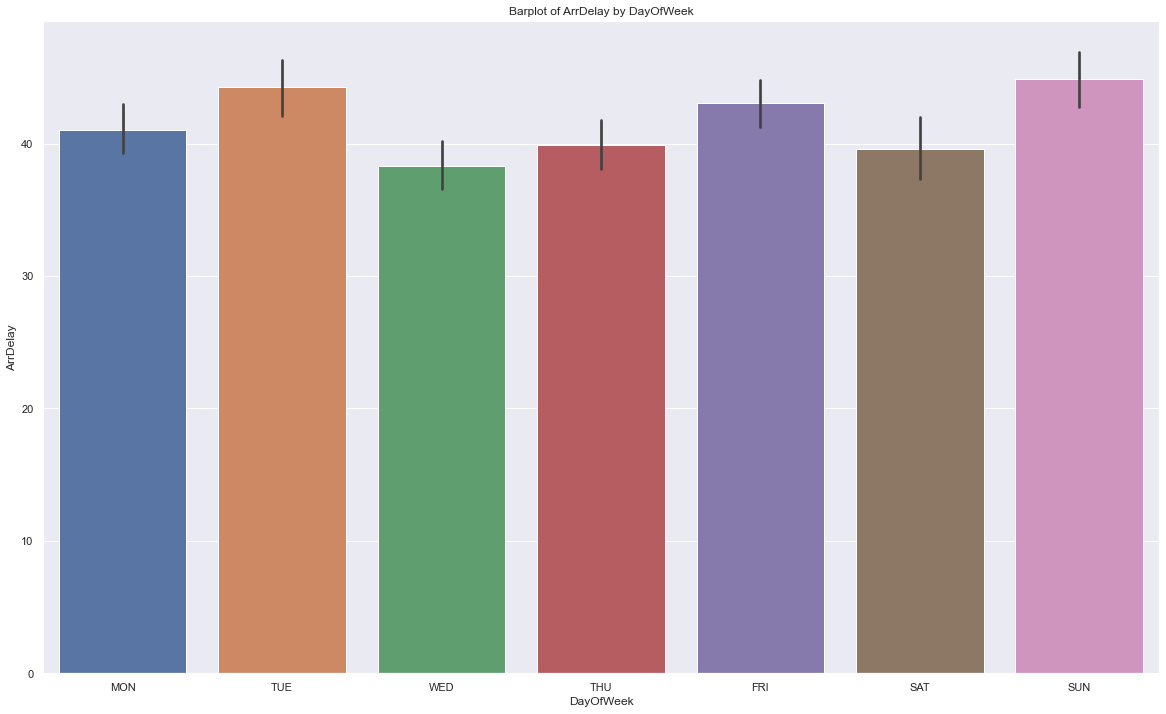

In [7]:
#Replace number day of week to string for graphic use
df_sample.DayOfWeek = df_sample.DayOfWeek.replace({1:"MON",2:"TUE",3:"WED",4:"THU",5:"FRI",6:"SAT",7:"SUN"})
fig, ax = plt.subplots(figsize=(20,12))
sTitle = 'Barplot of ArrDelay by DayOfWeek'
ax.set_title(sTitle)
sns.barplot(x= 'DayOfWeek', y= 'ArrDelay' , data= df_sample, order=["MON","TUE","WED","THU","FRI","SAT","SUN"])
plt.show()

It seems that the maximum delay is on Sunday and the minimum on Wednesday

Let's graphic ArrDelay by Date to see some pattern.

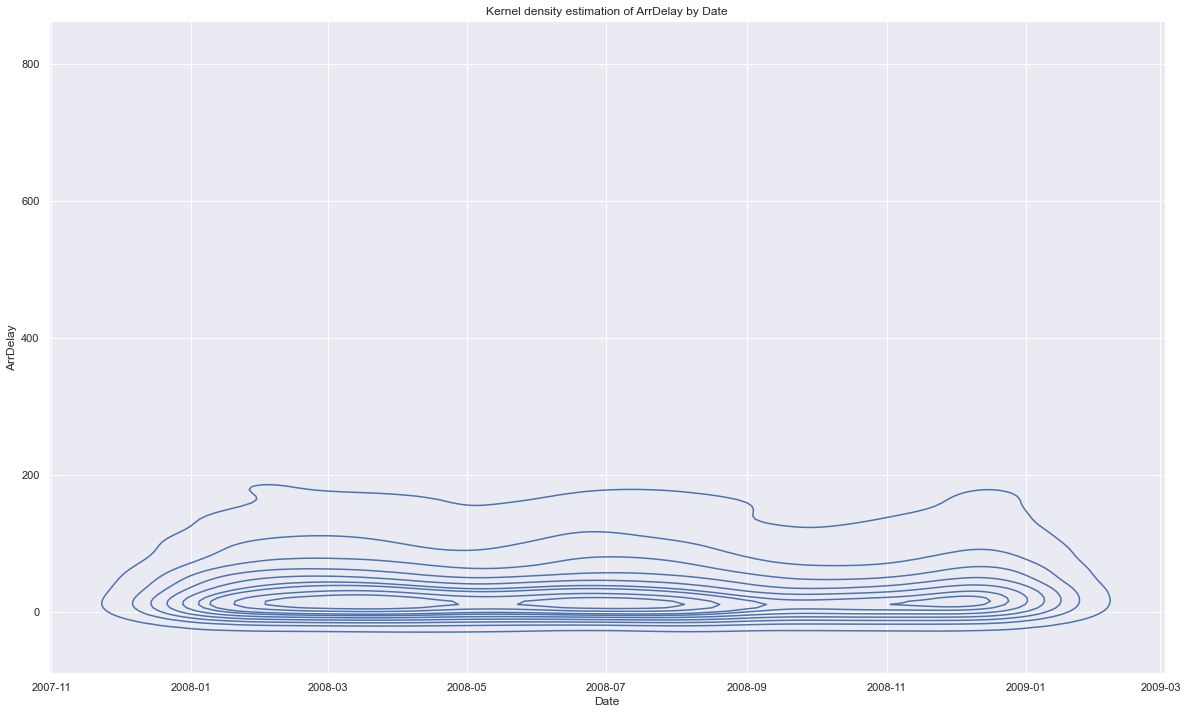

In [8]:
fig, ax = plt.subplots(figsize=(20,12))
sTitle = 'Kernel density estimation of ArrDelay by Date'
ax.set_title(sTitle)
sns.kdeplot(x= 'Date', y= 'ArrDelay' , data= df_sample)
plt.show()

This curious bivariate distribution kdplot seems to indicate that around 2008-03 / 2008-7 and 2008-12 there were more delays.   
Let's continue with our pre-processing process.

In [9]:
# Description of preprocessed dataframe
df_sample.describe(include='all',datetime_is_numeric=True).round(2).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
DayOfWeek,19283,7,FRI,3254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DepTime,19283.0,NaN,NaN,NaN,1519.2,2.0,1204.0,1544.0,1859.0,2400.0,447.46
CRSDepTime,19283.0,NaN,NaN,NaN,1467.97,15.0,1135.0,1510.0,1815.0,2359.0,421.79
ArrTime,19283.0,NaN,NaN,NaN,1611.58,1.0,1317.5,1715.0,2029.0,2400.0,545.79
CRSArrTime,19283.0,NaN,NaN,NaN,1633.48,0.0,1325.0,1705.0,2012.0,2359.0,463.17
UniqueCarrier,19283,20,WN,3762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActualElapsedTime,19283.0,NaN,NaN,NaN,133.38,20.0,81.0,116.0,165.0,647.0,72.11
CRSElapsedTime,19283.0,NaN,NaN,NaN,134.33,15.0,82.0,117.0,165.0,660.0,71.33
AirTime,19283.0,NaN,NaN,NaN,108.38,7.0,58.0,90.0,137.0,622.0,68.87
ArrDelay,19283.0,NaN,NaN,NaN,41.67,-59.0,9.0,24.0,55.0,832.0,53.72


In [10]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19283 entries, 1533757 to 164166
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DayOfWeek          19283 non-null  object        
 1   DepTime            19283 non-null  float64       
 2   CRSDepTime         19283 non-null  int64         
 3   ArrTime            19283 non-null  float64       
 4   CRSArrTime         19283 non-null  int64         
 5   UniqueCarrier      19283 non-null  object        
 6   ActualElapsedTime  19283 non-null  float64       
 7   CRSElapsedTime     19283 non-null  float64       
 8   AirTime            19283 non-null  float64       
 9   ArrDelay           19283 non-null  float64       
 10  Distance           19283 non-null  int64         
 11  TaxiIn             19283 non-null  float64       
 12  TaxiOut            19283 non-null  float64       
 13  Date               19283 non-null  datetime64[ns]
dtyp

Finally, let's standardize all numerical columns and OHE the Carrier column.

In [11]:
# Standardize df_train
# list for cols to scale (all except for day of week).
cols_to_scale = df_sample._get_numeric_data().columns
# create and fit scaler
scaler = StandardScaler()
scaler.fit(df_sample[cols_to_scale])
# scale selected data
df_sample[cols_to_scale] = scaler.transform(df_sample[cols_to_scale])
# Show head df
df_sample.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Date
1533757,THU,0.466659,0.431571,0.425856,0.381125,WN,-0.795755,-0.761680,-0.760614,-0.142721,-0.688341,0.789406,-0.649418,2008-10-16
1103252,WED,0.893527,0.917609,0.777651,0.823735,WN,-0.781888,-0.761680,-0.658966,-0.384707,-0.627480,-0.340641,-0.649418,2008-07-23
591899,SUN,1.190770,1.344375,1.087303,1.115209,WN,-0.837358,-0.831776,-0.717051,-0.496393,-0.676169,-0.905665,-0.437526,2008-04-20
593783,TUE,0.240933,0.360444,0.552282,0.586237,WN,-0.379729,-0.411204,-0.324977,-0.626693,-0.154505,-0.340641,-0.225635,2008-04-22
903004,WED,0.947165,1.071719,0.805135,0.845325,WN,-0.906696,-0.971966,-0.862263,-0.291635,-0.843101,-0.905665,-0.084373,2008-06-18


In [13]:
# Get dummies of all unique values of attribute UniqueCarrier.
df_sample = pd.get_dummies(df_sample,columns=['UniqueCarrier'])
df_sample.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Date,Delayed,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1533757,THU,0.466659,0.431571,0.425856,0.381125,-0.795755,-0.761680,-0.760614,-0.142721,-0.688341,0.789406,-0.649418,2008-10-16,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1103252,WED,0.893527,0.917609,0.777651,0.823735,-0.781888,-0.761680,-0.658966,-0.384707,-0.627480,-0.340641,-0.649418,2008-07-23,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
591899,SUN,1.190770,1.344375,1.087303,1.115209,-0.837358,-0.831776,-0.717051,-0.496393,-0.676169,-0.905665,-0.437526,2008-04-20,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
593783,TUE,0.240933,0.360444,0.552282,0.586237,-0.379729,-0.411204,-0.324977,-0.626693,-0.154505,-0.340641,-0.225635,2008-04-22,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
903004,WED,0.947165,1.071719,0.805135,0.845325,-0.906696,-0.971966,-0.862263,-0.291635,-0.843101,-0.905665,-0.084373,2008-06-18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Level 1

## - Exercise 1
Create at least three different classification models to try to predict as well as possible the delay of the flights (ArrDelay) of DelayedFlights.csv.  
Consider whether the flight has arrived late or not (ArrDelay > 0).

### 1.1.- Decision Tree Classification

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.  It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision making. It can be visualized like a flowchart diagram which easily mimics human level thinking. That is why decision trees are easy to understand and interpret.

![](2022-03-15-11-32-53.png)

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.  

From: https://app.datacamp.com/workspace/w/0ede46e9-76cd-4232-9215-adb63ba6efad/edit

Let's create the 'Delayed' column to predict classification Delayed = 'Yes' or 'No'

In [14]:
df_sample['Delayed'] = (df_sample['ArrDelay']> 0)
print("Number of flights Delayed are",df_sample['Delayed'].sum(),"of",len(df_sample))
df_sample.head()

Number of flights Delayed are 6427 of 19283


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Date,Delayed,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1533757,THU,0.466659,0.431571,0.425856,0.381125,-0.795755,-0.761680,-0.760614,-0.142721,-0.688341,0.789406,-0.649418,2008-10-16,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1103252,WED,0.893527,0.917609,0.777651,0.823735,-0.781888,-0.761680,-0.658966,-0.384707,-0.627480,-0.340641,-0.649418,2008-07-23,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
591899,SUN,1.190770,1.344375,1.087303,1.115209,-0.837358,-0.831776,-0.717051,-0.496393,-0.676169,-0.905665,-0.437526,2008-04-20,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
593783,TUE,0.240933,0.360444,0.552282,0.586237,-0.379729,-0.411204,-0.324977,-0.626693,-0.154505,-0.340641,-0.225635,2008-04-22,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
903004,WED,0.947165,1.071719,0.805135,0.845325,-0.906696,-0.971966,-0.862263,-0.291635,-0.843101,-0.905665,-0.084373,2008-06-18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0



## - Exercise 2
Compare the classification models using accuracy, a confidence matrix and other more advanced metrics.



## - Exercise 3
Train them using the different parameters they admit.



## - Exercise 4
Compare their performance using the trait/test or cross-validation approach.



# Level 2
## - Task 5
Carry out some process of variable engineering to improve your prediction.



# Level 3
## - Exercise 6
Do not use the variable DepDelay when making predictions.